In [ ]:
#---------------------------------------------------------------------------------
# Please do not upload to other sites without the author's permission.
# Instead, link to the original Github repository and,
# and remember to cite and give credit.
#
# AUTHOR: Putra Pandu Adikara
# Faculty of Computer Science, Universitas Brawijaya
# Email: adikara.putra [at] ub.ac.id
# Update: November 1, 2024
# - Fix some untranslated text
# -
#---------------------------------------------------------------------------------

# 1 Supervised Learning - Sentiment Analysis

*Make a second copy of this Notebook so that you can still see the sample output.*

Use Google Colab or local Jupyter Notebook.

## 1.1 Loading Data

This data contains comments from Instagram in Indonesian language taken from public Github repo by Rizal Setya Perdana. You can try to search for other similar datasets (or create your own) in your own native language.

In [ ]:
url = r'https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv'

Import library pandas

image.png

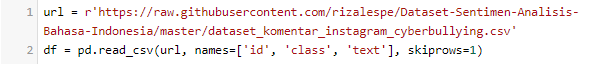

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Display data on DataFrame after successful loading

image.png

**Output:**

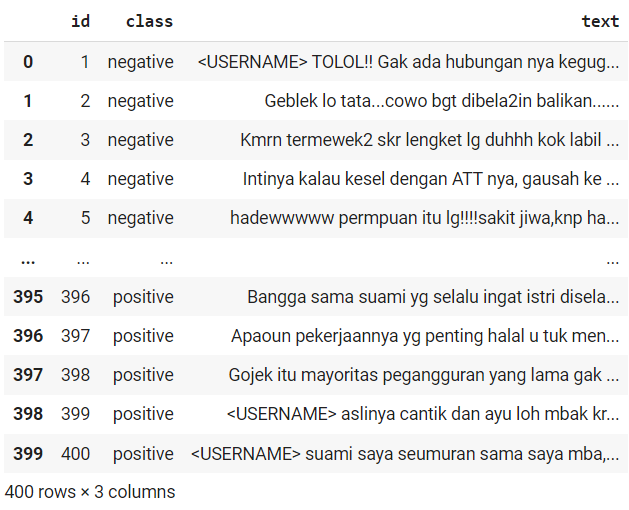

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,class,text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


image.png

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


array(['negative', 'positive'], dtype=object)

image.png

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,text
class,,
negative,200,200
positive,200,200


Visualize the distribution of Positive and Negative classes in the form of a bar chart.

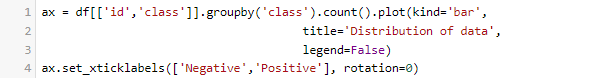

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

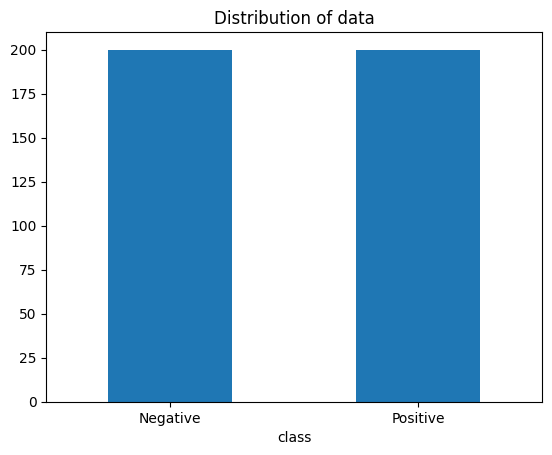

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


## 1.2 Preprocessing

Install the necessary library:
* Sastrawi is needed for Indonesian stemming

For other languages, we need different libraries. For example we can use Snowball/Porter stemmer for English.

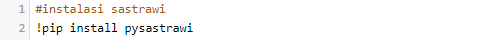

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.4 MB/s eta 0:00:00


### 1.2.1 Get a sample text from the data

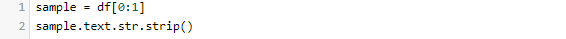

In [ ]:
# Coba jalankan kode berikut tanpa exception, hilangkan komentar # di depan baris,
# lalu Run atau ketik Shift+Enter/Alt+Enter/Ctrl+Enter

# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


(15    negative
 Name: class, dtype: object,
 15    Yg jd masalah disini adalah 1. mereka ciuman d...
 Name: text, dtype: object)

image.png

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


'Yg jd masalah disini adalah 1. mereka ciuman dpn org bnyk yg SEHARUSNYA sih punya rasa MALU, kecuali mgkn lg mabok jd gak ada rasa malu. 2. Mereka berteman?? Helooow sebuah pertemanan tdk akan melibatkan ciuman BIBIR, coba aja kalian bayangin, sanggup gak ciuman bibir ma TEMAN? pasti lbh dr teman lah itu. Dasar Kelakuan Kids jaman now yg emg bego, bukan krn kebanyakan micin lho yah ??'

### 1.2.2 Case folding

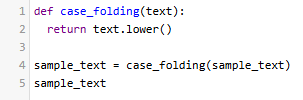

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


'yg jd masalah disini adalah 1. mereka ciuman dpn org bnyk yg seharusnya sih punya rasa malu, kecuali mgkn lg mabok jd gak ada rasa malu. 2. mereka berteman?? helooow sebuah pertemanan tdk akan melibatkan ciuman bibir, coba aja kalian bayangin, sanggup gak ciuman bibir ma teman? pasti lbh dr teman lah itu. dasar kelakuan kids jaman now yg emg bego, bukan krn kebanyakan micin lho yah ??'

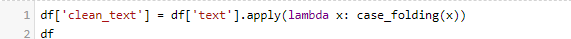

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,class,text,clean_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,<username> tolol!! gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...","intinya kalau kesel dengan att nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...","hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,<username> aslinya cantik dan ayu loh mbak kr...


### 1.2.3 Cleaning

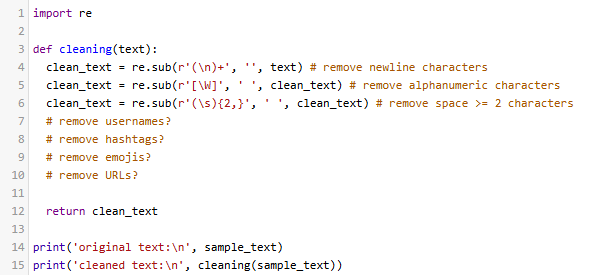

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


original text:
 yg jd masalah disini adalah 1. mereka ciuman dpn org bnyk yg seharusnya sih punya rasa malu, kecuali mgkn lg mabok jd gak ada rasa malu. 2. mereka berteman?? helooow sebuah pertemanan tdk akan melibatkan ciuman bibir, coba aja kalian bayangin, sanggup gak ciuman bibir ma teman? pasti lbh dr teman lah itu. dasar kelakuan kids jaman now yg emg bego, bukan krn kebanyakan micin lho yah ??
cleaned text:
 yg jd masalah disini adalah 1 mereka ciuman dpn org bnyk yg seharusnya sih punya rasa malu kecuali mgkn lg mabok jd gak ada rasa malu 2 mereka berteman helooow sebuah pertemanan tdk akan melibatkan ciuman bibir coba aja kalian bayangin sanggup gak ciuman bibir ma teman pasti lbh dr teman lah itu dasar kelakuan kids jaman now yg emg bego bukan krn kebanyakan micin lho yah 


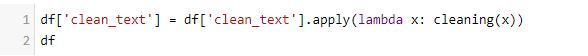

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,class,text,clean_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubungan nya keguguran...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibela2in balikan hade...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lg sakit jiwa knp harus...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username aslinya cantik dan ayu loh mbak krn ...


### 1.2.4 Stopword Removal

**Stopword List** is a list of words that are considered unnecessary/not important/insignificant. Generally, these stopwords are adverbs, conjunctions, or other “unimportant” words.

In  Information Retrieval, stopword removal is important to reduce the vocabulary and the size of the stored index so as to speed up the computational process.

The words “not”, no” in Information Retrieval are considered unimportant (considered stopwords). However, in Sentiment Analysis, the word “not” is a kind of negation word that changes the meaning of the sentiment, for example “not good” if the word “not” is removed becomes “good”.

**However, in the case of Natural Language Processing, especially Sentiment Analysis, we must be careful!**

> We need to create a special stopword list for sentiment analysis

### 1.2.5 Stemming

Sastrawi is used for the stemming process, converting affixed words into their stem word/basic word (but not the root word).

Sastrawi also provides a stopword list, to remove words that are not considered important, for example for indexing.


**Attention!** For sentiment analysis cases, stopwords containing NEGATION words such as *no*, *not*, *nope*, etc. should not be removed as they may change the sentiment meaning, e.g. ``not good`` if the word ``not`` (due to stopwords) is removed, it becomes ``good``.

As previously mentioned, for other languages we need different stemmers, for example, Snowball/Porter stemmer for English.




Import Stemming library using Sastrawi

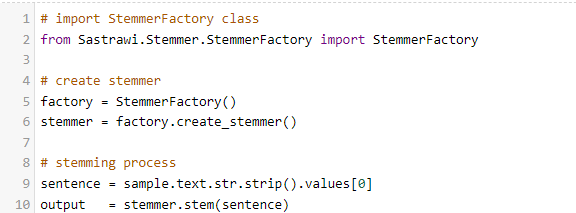

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


image.png

('yg jd masalah disini adalah 1. mereka ciuman dpn org bnyk yg seharusnya sih punya rasa malu, kecuali mgkn lg mabok jd gak ada rasa malu. 2. mereka berteman?? helooow sebuah pertemanan tdk akan melibatkan ciuman bibir, coba aja kalian bayangin, sanggup gak ciuman bibir ma teman? pasti lbh dr teman lah itu. dasar kelakuan kids jaman now yg emg bego, bukan krn kebanyakan micin lho yah ??',
 'yg jd masalah sini adalah 1 mereka cium dpn org bnyk yg harus sih punya rasa malu kecuali mgkn lg mabok jd gak ada rasa malu 2 mereka teman helooow buah teman tdk akan libat cium bibir coba aja kalian bayangin sanggup gak cium bibir ma teman pasti lbh dr teman lah itu dasar laku kids jaman now yg emg bego bukan krn banyak micin lho yah')

Example in English using Porter stemmer and NLTK

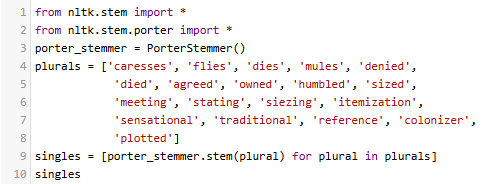

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


['caress',
 'fli',
 'die',
 'mule',
 'deni',
 'die',
 'agre',
 'own',
 'humbl',
 'size',
 'meet',
 'state',
 'siez',
 'item',
 'sensat',
 'tradit',
 'refer',
 'colon',
 'plot']

Show an example of stemming results on the first data


In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Perform the stemming process, save it in the clean_text column, then display the data


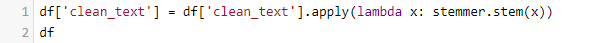

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,class,text,clean_text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubung nya gugur dgn pa...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibela2in balik hadeww...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kalau kesel dengan att nya gausah ke anak...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lg sakit jiwa knp harus...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri sela w...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg penting halal u tuk nafkah kel...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik dan ayu loh mbak krn aku ...


Import the required library: NLTK, Spacy which are two commonly used library for text processing. In this case Spacy has not been used. You may explore what functions are provided by NLTK and Spacy.


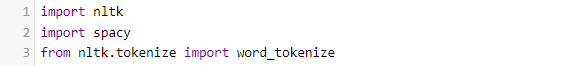

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Download the included dataset in order to perform tokenization using NLTK.

image.png

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

image.png

Display the data

image.png

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,id,class,text,clean_text,bow
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubung nya gugur dgn pa...,"[username, tolol, gak, ada, hubung, nya, gugur..."
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibela2in balik hadeww...,"[geblek, lo, tata, cowo, bgt, dibela2in, balik..."
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...,"[kmrn, termewek2, skr, lengket, lg, duhhh, kok..."
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kalau kesel dengan att nya gausah ke anak...,"[inti, kalau, kesel, dengan, att, nya, gausah,..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lg sakit jiwa knp harus...,"[hadewwwww, permpuan, itu, lg, sakit, jiwa, kn..."
...,...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri sela w...,"[bangga, sama, suami, yg, selalu, ingat, istri..."
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg penting halal u tuk nafkah kel...,"[apaoun, kerja, yg, penting, halal, u, tuk, na..."
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...,"[gojek, itu, mayoritas, pegangguran, yang, lam..."
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik dan ayu loh mbak krn aku ...,"[username, asli, cantik, dan, ayu, loh, mbak, ..."


## 1.3 Create Sentiment Analysis Model

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Import the necessary libraries
* ``pickle`` to store the model
* ``svm.LinearSVC``, ``LogisticRegression`` as classifier
* ``model_selection.train_test_split`` to split the dataset into training data (*train*) and test data (*test*)
* ``linear_model.TfidfVectorizer`` for word feature extraction and word weighting with TF-IDF
* ``metrics.classification_report`` for displaying classification results in the form of textual-based confusion matrix


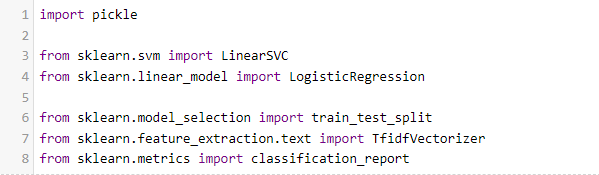

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Split the dataset into training data (X_test, y_test) and validation/test data (X_test, y_test).


> In real world, we do not know the actual class of the test data
> Our final objective is to predict the class of unknown test data

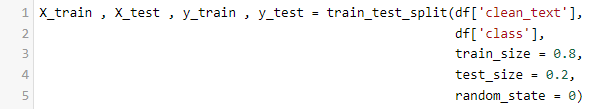

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


(336         cewenya manis cakep yg skrg dr yg kmrn ga jd
 64     username lah goblok amat gak semua netizen yg ...
 55     heran deh yg ngatain si via baperan ya wajar l...
 106    ga pantes panggil ustad org munafik ceramah sa...
 300    username iya aku sih jujur bukan fans nia bias...
                              ...                        
 323    mau duda mau singgel itu ngak masalah yg penti...
 192    editanx paraaaahh oplas aj laaah nyai drpd nge...
 117    username noh urus tu kuin lu biar ga gatel nem...
 47     ah manda mah gatel ga bisa liyat cowo dikit lg...
 172    iyaaa gue pernah pacar udah nikah malah tapi g...
 Name: clean_text, Length: 320, dtype: object,
 336    positive
 64     negative
 55     negative
 106    negative
 300    positive
          ...   
 323    positive
 192    negative
 117    negative
 47     negative
 172    negative
 Name: class, Length: 320, dtype: object)

(132    yang pada bilang enji ganteng bebas slingkuh b...
 309    pada protes kenapa sih yang protes itu coba us...
 341    username euum tuju sekaliii emang cantik ini d...
 196    wey org goblok juga bisa bedain vape shisha sm...
 246    semangat mebangun indonesia yg lebih maju pak ...
                              ...                        
 14     emang bukan hal tabu cium gitu iya emang tapi ...
 363    ashanti bunda the best slalu bain support anak...
 304    username iya betul mba ariel gak ganteng tapi ...
 361    asa kaya mau manggung kk username moga lancar ...
 329    begini pasang suami istri yg normal romantisme...
 Name: clean_text, Length: 80, dtype: object,
 132    negative
 309    positive
 341    positive
 196    negative
 246    positive
          ...   
 14     negative
 363    positive
 304    positive
 361    positive
 329    positive
 Name: class, Length: 80, dtype: object)

Term weighting using TF-IDF


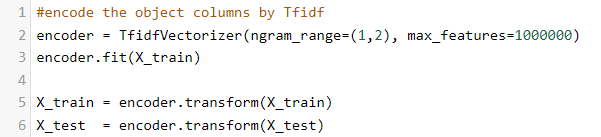

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


<320x9104 sparse matrix of type '<class 'numpy.float64'>'
	with 13828 stored elements in Compressed Sparse Row format>

Create a model evaluation function by predicting the test data.

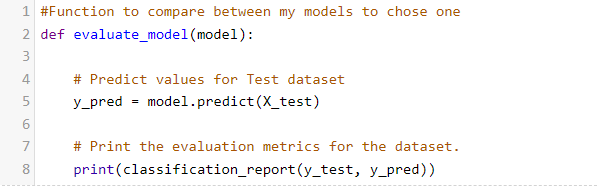

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Create a classification model using **Support Vector Machine (SVM)** and evaluate the model by calling the ``evaluate_model`` function.


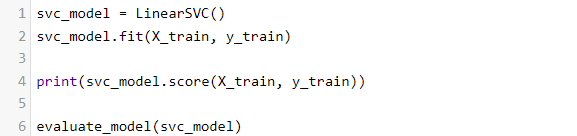

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


1.0
              precision    recall  f1-score   support

    negative       0.98      0.87      0.92        46
    positive       0.85      0.97      0.90        34

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



Display the confusion matrix from the training stage using SVM.


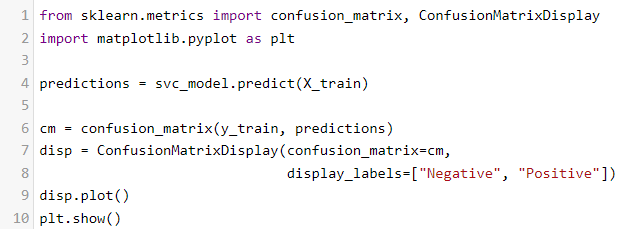

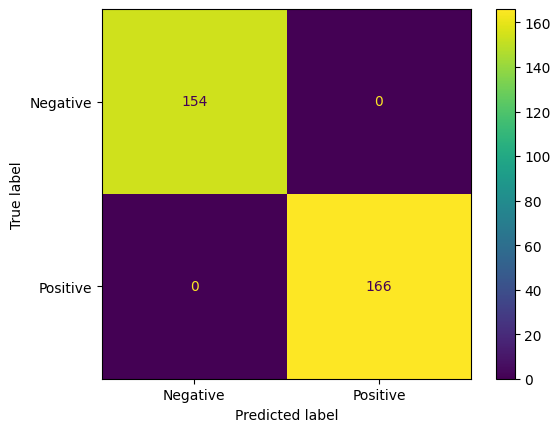

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


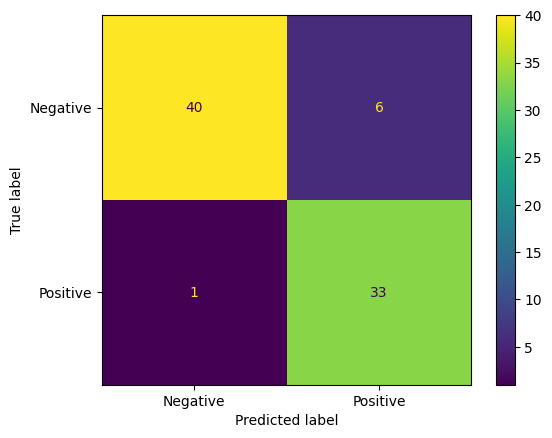

Create a classification model using the **Logistic Regression (Logit or MaxEnt/Maximum Entropy)** classifier and evaluate the model by calling the ``evaluate_model`` function.


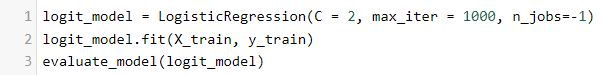

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Display the confusion matrix from the training phase with Logistic Regression


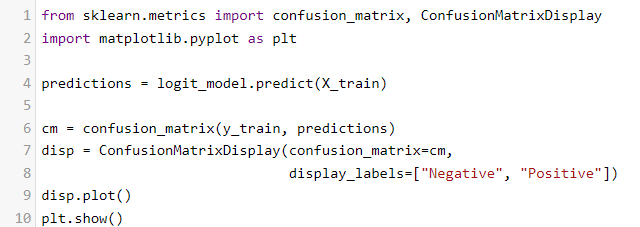

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Display the confusion matrix from the training phase with Logistic Regression


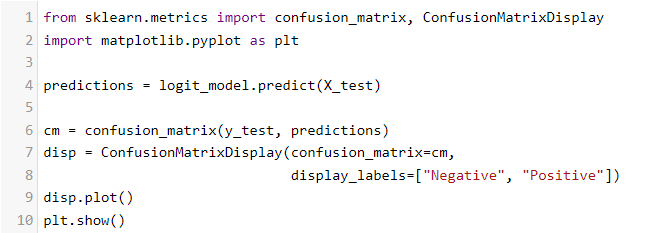

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


In [ ]:
# Compare the Confusion Matrix results of training and testing using SVM and Logistic Regression
# What can be concluded?

In [ ]:
# How are the training and testing performance results, what are the differences and
# what phenomena can be explained here?


## 1.4 Save the prediction model



Save the  Logistic Regression model (and also SVM)

<!-- 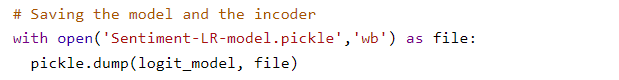 -->
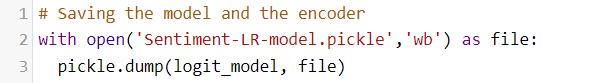

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Save encoder that use TF-IDF

<!-- 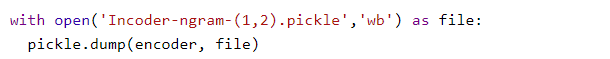 -->
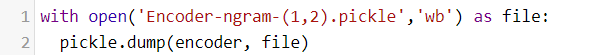

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


## 1.5 Load the saved prediction model

Loading model

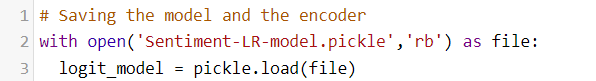

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Load the encoder

<!-- 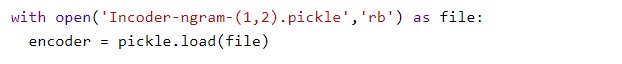 -->
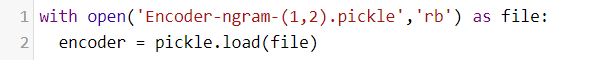

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


## 1.6 Test the prediction model with new test data  

This test is done at the deployment stage after we have the final model on new data that has no known label and we want to predict the sentiment of the data.

Create new data, just one is enough for this .




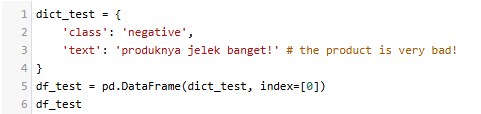

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


,class,text
0,negative,produknya jelek banget!


**Perform the same pre-processing as during training!**

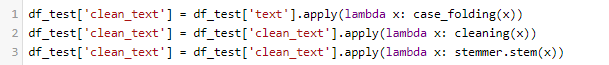

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


Predict the new data we just created

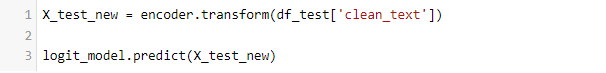

In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`


array(['negative'], dtype=object)

**Exercise 1:** Try removing the 'class' key from the dictionary and create a new DataFrame again. Perform predictions on this new DataFrame. Is there any effect?


**Exercise 2:** Replace the new data above for example with text with negative sentiment. Then run the prediction process again, is the result correct?





In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`
# Exercise 1


In [ ]:
# type the above program code (without line number) after these commented lines
# then run it via `Run` on the toolbar or type `ALT+Enter`/`CTRL+Enter`/`Shift+Enter`
# Exercise 2


## 1.7 Type of Classification
**1 data 1 label**
**Binary Classification**: 0 and 1 (always the opposite), e.g. Life and Death, Cancer or No Cancer

**Multiclassification termasuk Binary**: negative and positive (try adding one class, very positive, very negative, neutral) if you can then it is considered as the Multiclass problem. In Alive and Dead classes, we cannot add Very Dead or Very Alive, Half Dead, Half Alive, so it is more appropriate as a binary classification.


**1 data can have multiple labels**
**Multilabel classification**: 1 document has multiple labels, 1 news article can have labels Economy, Automotive


* $True Positive (TN)$ = Positive is predicted as Positive
    - cancer is predicted cancer,
    - cyberbullying is predicted cyberbullying

* $True Negative (TN)$ = Negative is predicted as Negative
    - not-cancer is predicted not-cancer,
    - non-cyberbullying is predicted non-cyberbullying

* $False Positive (FP)$ = Negative is predicted as Positive (error Type I)
    - Not-cancer is predicted cancer
    - non-cyberbullying is predicted cyberbullying


* $False Negative (FN)$ = Positive predicted as Negative (error Type II)
    - cancer is predicted not cancer
    - cyberbullying is predicted non-cyberbullying


## 1.8 Evaluation Metrics
* $Precision_{negative} = \frac{TP}{TP+FP}
  = 154/(154+0) = 1.0$

* $Recall_{negative} = \frac{TP}{TP+FN}
  = 154/(154+0) = 1.0$

* $Precision_{positive} = \frac{TP}{TP+FP} = 166/(166+0) = 1.0$

* $Recall_{positive} = \frac{TP}{TP+FN} = 166/(166+0) = 1.0$

* $Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$ = 154+166/(total data) = 1.0$

* $F-measure = \frac{2 \times P R}{P+R}$ => the harmonic mean between precision and recall



## 1.9 Problems with Supervised Learning
* Overfitting = the model fails to predict new data despite good/excellent training performance. Indicator: training performance is good, testing performance is poor.

> Example: 1.0 (training) --> 0.7 (test)

* Underfitting = the model fails to predict new data because the training performance is also poor. Indicators: poor training performance, poor test performance

> Example: 0.6 (training) --> 0.5 (test)

* Best fit / Ideal = good generalization results with indicators of good training performance results, test performance results are also good (not significantly different from training results)

> Example: 0.9 - 0.8, 0.8- 0.7
